#import the data and clean it

In [1]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maanu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
csv_path="BA_reviews.csv"
data=pd.read_csv(csv_path)
data.reset_index(drop=True,inplace=True)
print(data['reviews'])

0      ✅ Trip Verified |  I am in Australia and on Fr...
1      ✅ Trip Verified |  At 7.54 am on the day of tr...
2      ✅ Trip Verified |  Would happily fly them agai...
3      Not Verified |  Flew premium, only worth the e...
4      ✅ Trip Verified |  First our morning flight wa...
                             ...                        
995    ✅ Trip Verified |  London to Montreal. I did m...
996    ✅ Trip Verified |  Tokyo to Amsterdam via Lond...
997    ✅ Trip Verified | Check-in at Vienna Airport w...
998    ✅ Trip Verified | Took a day trip to Vienna wi...
999    ✅ Trip Verified |  Glasgow to Heathrow. BA are...
Name: reviews, Length: 1000, dtype: object


In [3]:
data.info()

data.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


<bound method NDFrame.describe of      Unnamed: 0                                            reviews
0             0  ✅ Trip Verified |  I am in Australia and on Fr...
1             1  ✅ Trip Verified |  At 7.54 am on the day of tr...
2             2  ✅ Trip Verified |  Would happily fly them agai...
3             3  Not Verified |  Flew premium, only worth the e...
4             4  ✅ Trip Verified |  First our morning flight wa...
..          ...                                                ...
995         995  ✅ Trip Verified |  London to Montreal. I did m...
996         996  ✅ Trip Verified |  Tokyo to Amsterdam via Lond...
997         997  ✅ Trip Verified | Check-in at Vienna Airport w...
998         998  ✅ Trip Verified | Took a day trip to Vienna wi...
999         999  ✅ Trip Verified |  Glasgow to Heathrow. BA are...

[1000 rows x 2 columns]>

In [4]:
data["reviews"]=data["reviews"].str.strip()
data["reviews"]=data["reviews"].str.lstrip("✅ Trip Verified |")
data["reviews"]=data["reviews"].str.lstrip("Not Verified |")
data["reviews"]=data["reviews"].str.lower()

#sentiment analysis using nltk

In [5]:
#let's remove punctuation
data["reviews"]=data["reviews"].str.replace("[^\w\s]"," ")#replaces all , . "" etc with space

#let's tokenize the string
data["reviews"]=data.apply(lambda row: nltk.word_tokenize(row["reviews"]),axis=1)

#let's remove the stoping words
data["reviews"]=data["reviews"].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))

data.iloc[0,1]

C:\Users\maanu\AppData\Local\Temp\ipykernel_18592\3193572728.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["reviews"]=data["reviews"].str.replace("[^\w\s]"," ")#replaces all , . "" etc with space


'australia friday night went online book flight heathrow malpensa milan realise specifically searched flights malpensa offered options airports milan received itinerary email another airport milan itinerary email provide means contact changes advise 24 hour cooling period weekend unable reach office monday advised refund fees missed 24 hour cooling period apparently ticket issued uk needed contact cancelled ticket going way future avoid flying british airways'

In [6]:
#let's calculate the polarity of the sentence to gather sentiment tags
def calc_polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

def calc_tag(num):
    if num>0:
        return "Positive"
    elif num<0:
        return "Negative"
    else:
        return "Neutral"

data["polarity"]=data["reviews"].apply(calc_polarity)

data["tags"]=data["polarity"].apply(calc_tag)

print(data)

     Unnamed: 0                                            reviews  polarity  \
0             0  australia friday night went online book flight... -0.112500   
1             1  7 54 day travel whilst driving london heathrow...  0.003704   
2             2  would happily fly personal emergency allowed r...  0.382500   
3             3  flew premium worth extra money bit extra room ...  0.022727   
4             4  first morning flight cancelled moved afternoon...  0.170000   
..          ...                                                ...       ...   
995         995  london montreal online check night left go air... -0.007873   
996         996  kyo amsterdam via london evening departure rec...  0.085931   
997         997  check vienna airport painless ba uses air loun...  0.377564   
998         998  k day trip vienna british airways booked last ... -0.047364   
999         999  glasgow heathrow ba disgrace stood high standa... -0.036000   

         tags  
0    Negative  
1    Po

#let's analyze the data

In [7]:
#find percentaage for tags column to analyze
(data.groupby('tags').size()/data['tags'].count())*100

tags
Negative    30.9
Neutral      1.4
Positive    67.7
dtype: float64

visualize the results

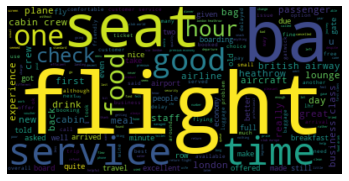

In [8]:
# visualizing th positive results in wordcloud
text = " "
for ind in data.index:
    if data['tags'][ind] == "Positive":
        text = text + data['reviews'][ind]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

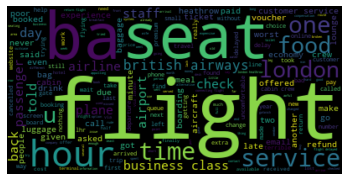

In [9]:
# visualizing th negative results in wordcloud
text = " "
for ind in data.index:
    if data['tags'][ind] == "Negative":
        text = text + data['reviews'][ind]
      
wordcloud_negative = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

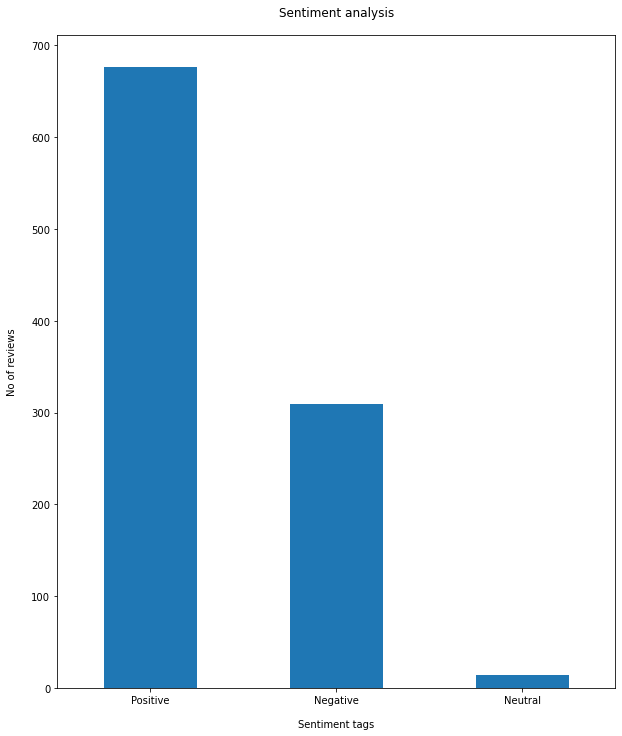

In [10]:
#let's visualize the count of each tags
data['tags'].value_counts().plot(kind='bar')
data['tags'].value_counts().plot(kind='bar', figsize=(10, 12), rot=0)
plt.xlabel("Sentiment tags", labelpad=14)
plt.ylabel("No of reviews", labelpad=14)
plt.title("Sentiment analysis", y=1.02);

In [12]:
data.to_csv("BA_reviews_dashboard.csv")